# **Edunet Foundation | Shell | AICTE**
## **(Artificial Intelligence with Green Technology)**

### **(Cycle 2) Advance Machine learning and Artificial Intelligence Project**
### **P4 - Plant Disease Detection System for Sustainable Agriculture**

**Student Name : Ithiraj Hazarika**

**AICTE Student ID : STU6128a95599d701630054741**

**AICTE Internship ID : INTERNSHIP_173070615967287aef12823**

**Problem Statement:** *To develop a CNN-based model for the detection and classification of plant diseases based on images of different crop leaves, such as apples, cherries, grapes, and corn. This model should be able to identify healthy versus diseased leaves and further categorize them into the respective disease types. Such a system would be instrumental in precision agriculture, especially in early detection of diseases and effective management.*

### **Step-wise Solution to the Problem Statement**


**Step 1:** Loading the Plant Disease Dataset from Google Drive using **mount()**

The link to download the Plant Disease Dataset is attached below. Once, the dataset is downloaded, we need to upload it on the Google Drive.

https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset/data?select=New+Plant+Diseases+Dataset%28Augmented%29

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Step 2:** Unzipping the dataset using **zipfile** and **os** libraries

In [ ]:
import zipfile
import os


# Defining the path to the zip file and the extraction directory
zip_file_path = "/content/drive/MyDrive/archive.zip"
extract_dir = "/content"

# Checking if the zip file exists
if os.path.exists(zip_file_path):
    try:
        # Creating a ZipFile object
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            # Extracting all contents to the specified directory
            zip_ref.extractall(extract_dir)
        print(f"Successfully extracted '{zip_file_path}' to '{extract_dir}'")
    except zipfile.BadZipFile:
        print(f"Error: '{zip_file_path}' is not a valid zip file.")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print(f"Error: '{zip_file_path}' does not exist.")

Successfully extracted '/content/drive/MyDrive/archive.zip' to '/content'


**Step 3:** Splitting the dataset into training, validation and testing datasets

In [ ]:
train="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train"
valid="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid"
test="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid"

**Step 4:** Performing **Exploratory Data Analysis (EDA)** to get insights of the dataset

**Step 4.1:** Displaying some random images from the training dataset

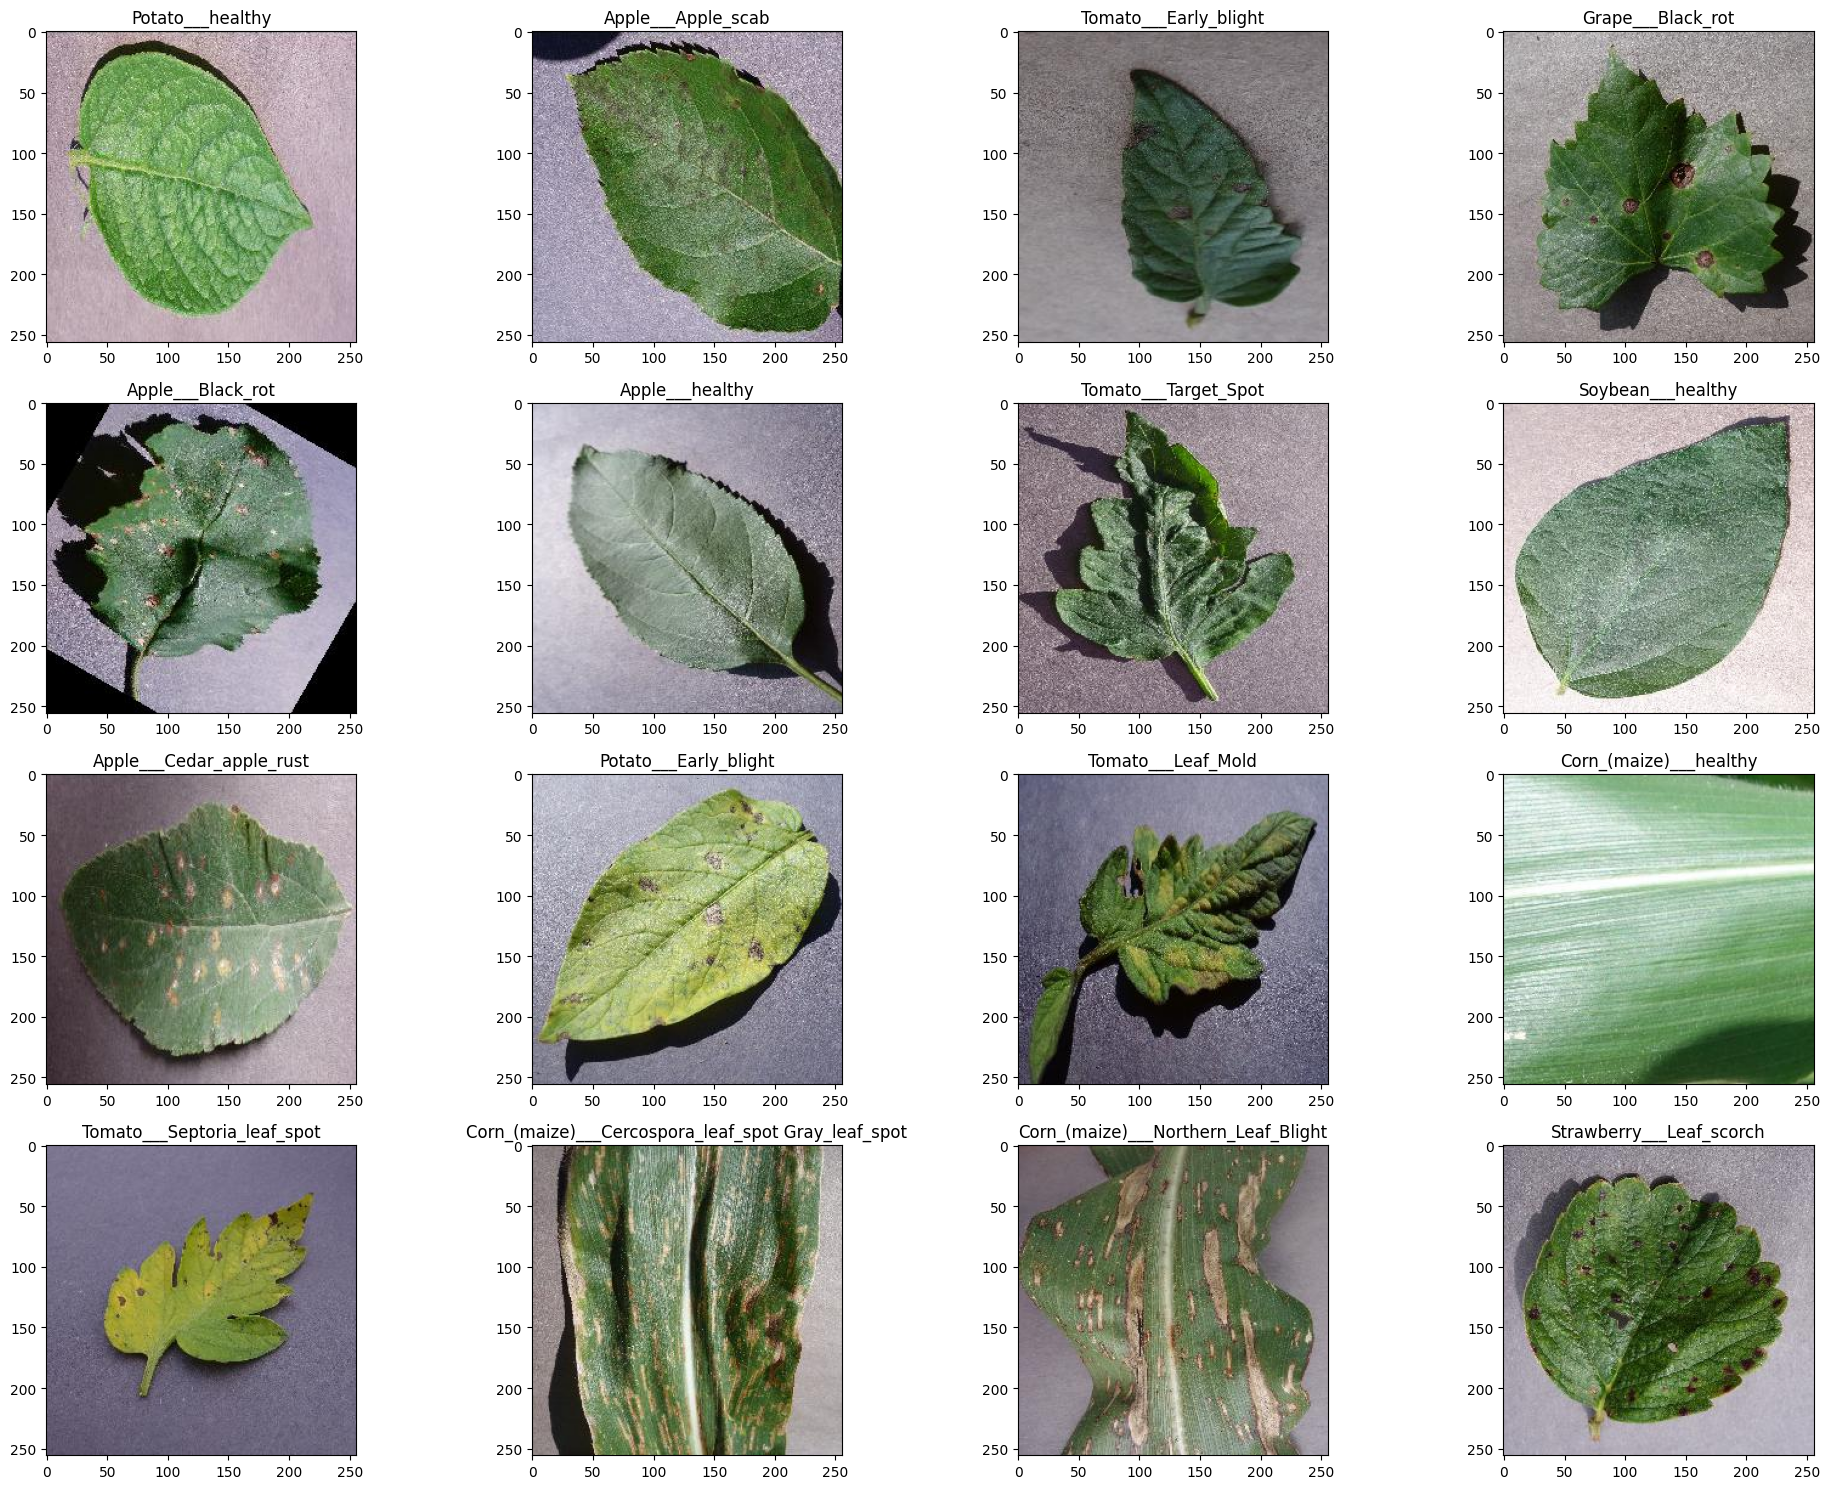

In [ ]:
import random
from PIL import Image
import matplotlib.pyplot as plt

# Displaying some random images from the training dataset
plt.figure(figsize=(20, 15))
for i, cls in enumerate(os.listdir(train)[:16]):
    class_path = os.path.join(train, cls)
    random_image = random.choice(os.listdir(class_path))
    image_path = os.path.join(class_path, random_image)
    plt.subplot(4, 4, i + 1)
    plt.imshow(Image.open(image_path))
    plt.title(cls)
plt.tight_layout()
plt.show()

**Step 4.2:** Checking some properties of the images in the dataset

In [ ]:
image_details = []

for cls in os.listdir(train):
    class_path = os.path.join(train, cls)
    for img in os.listdir(class_path):
        image_path = os.path.join(class_path, img)
        with Image.open(image_path) as image:
            details = {
                "File Name": img,
                "Class": cls,
                "Format": image.format,
                "Dimensions (WxH)": image.size,
                "Mode": image.mode,
            }
            image_details.append(details)

random_details = random.sample(image_details, 5)

for detail in random_details:
    print(detail)

{'File Name': '23902df1-1c32-482d-8b4a-3fbda797ca73___FAM_B.Rot 3216_flipLR.JPG', 'Class': 'Grape___Black_rot', 'Format': 'JPEG', 'Dimensions (WxH)': (256, 256), 'Mode': 'RGB'}
{'File Name': 'a19de63f-d409-44d7-a608-a0e8f74d83b1___RS_HL 5718.JPG', 'Class': 'Soybean___healthy', 'Format': 'JPEG', 'Dimensions (WxH)': (256, 256), 'Mode': 'RGB'}
{'File Name': 'RS_Rust 2525_flipLR.JPG', 'Class': 'Corn_(maize)___Common_rust_', 'Format': 'JPEG', 'Dimensions (WxH)': (256, 256), 'Mode': 'RGB'}
{'File Name': '09ae534a-e931-4f83-8545-cf330dfebae9___NREC_B.Spot 9210.JPG', 'Class': 'Pepper,_bell___Bacterial_spot', 'Format': 'JPEG', 'Dimensions (WxH)': (256, 256), 'Mode': 'RGB'}
{'File Name': '792d473d-472a-43df-b0e1-dba9ab94edd5___RS_GLSp 4330_new30degFlipLR.JPG', 'Class': 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Format': 'JPEG', 'Dimensions (WxH)': (256, 256), 'Mode': 'RGB'}


**Step 4.3:** Displaying the number of classes present in the training dataset

In [ ]:
classes = os.listdir(train)

class_counts = {cls: len(os.listdir(os.path.join(train, cls))) for cls in classes}

total_images = sum(class_counts.values())

print(f"Number of Classes: {len(classes)}")
print(f"Total Number of Images: {total_images}")
print("\nNumber of Classes:")
for cls in classes:
  print(cls)

Number of Classes: 38
Total Number of Images: 70295

Number of Classes:
Potato___healthy
Apple___Apple_scab
Tomato___Early_blight
Grape___Black_rot
Apple___Black_rot
Apple___healthy
Tomato___Target_Spot
Soybean___healthy
Apple___Cedar_apple_rust
Potato___Early_blight
Tomato___Leaf_Mold
Corn_(maize)___healthy
Tomato___Septoria_leaf_spot
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Corn_(maize)___Northern_Leaf_Blight
Strawberry___Leaf_scorch
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Strawberry___healthy
Grape___Esca_(Black_Measles)
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Pepper,_bell___Bacterial_spot
Tomato___Tomato_mosaic_virus
Tomato___Bacterial_spot
Tomato___Late_blight
Raspberry___healthy
Cherry_(including_sour)___healthy
Cherry_(including_sour)___Powdery_mildew
Orange___Haunglongbing_(Citrus_greening)
Grape___healthy
Tomato___Spider_mites Two-spotted_spider_mite
Squash___Powdery_mildew
Tomato___healthy
Peach___healthy
Pepper,_bell___healthy
Corn_(maize)___Common_rust_
Potato__

**Step 5:** Performing **Data Augmentation** on the datasets

**Step 5.1:** Performing Data Augmentation on the training dataset

In [ ]:
import tensorflow as tf

size = 224

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1/255.0,
    preprocessing_function=None,
    validation_split=0.1,
).flow_from_directory(train,
                      batch_size = 164,
                      target_size = (size, size),
                      subset = "training",
                      color_mode = 'rgb',
                      class_mode = 'categorical',
                      shuffle = True)

Found 63282 images belonging to 38 classes.


**Step 5.2:** Displaying some images from the training dataset after data augmentation

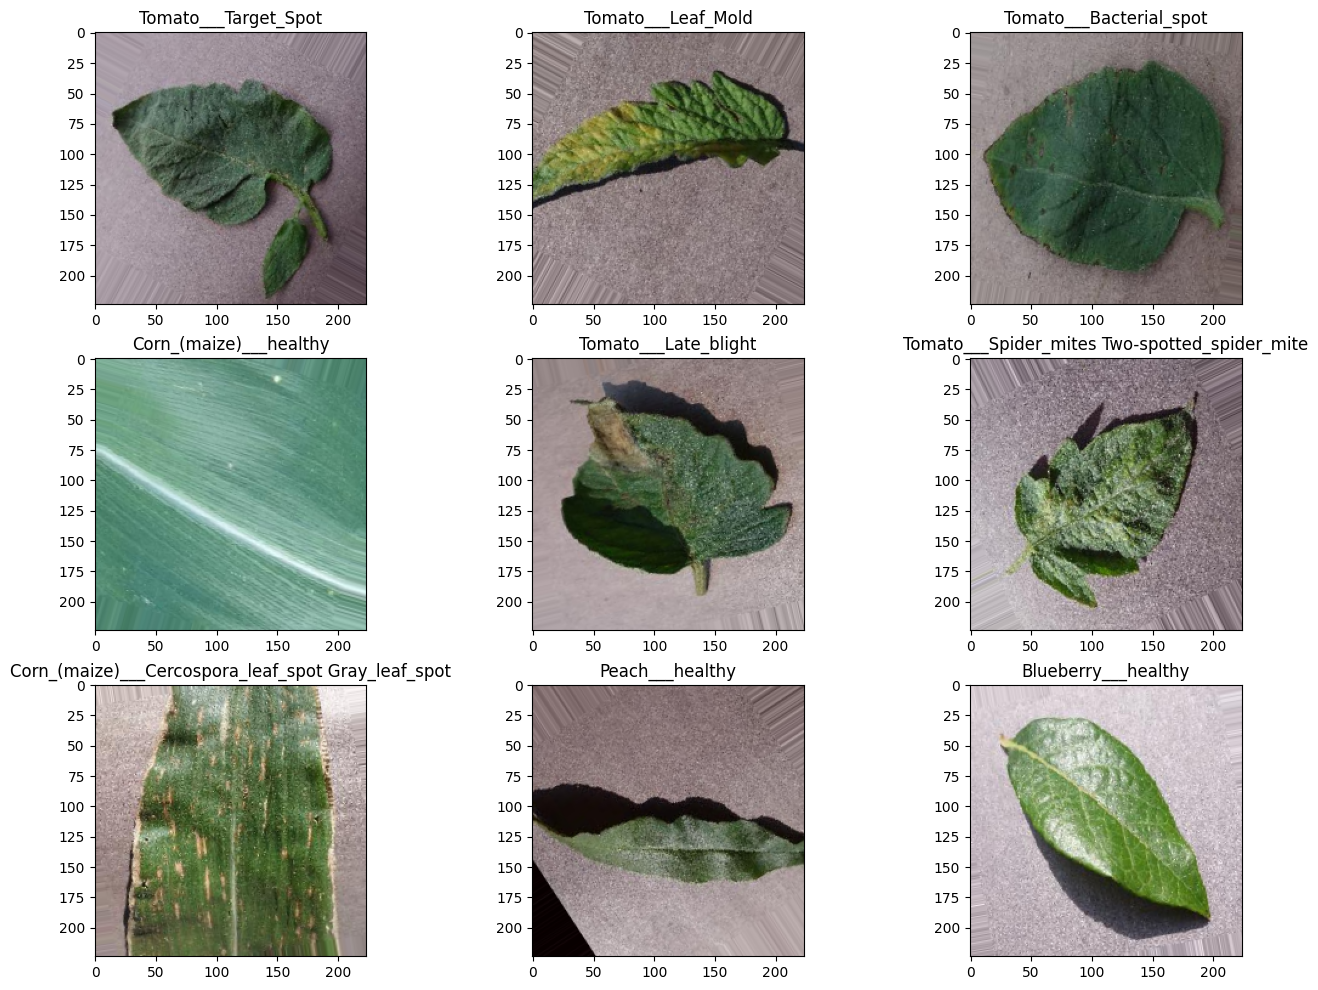

In [ ]:
import numpy as np

classes = list(train_generator.class_indices.keys())
plt.figure(figsize = (16, 12))
for X_batch, y_batch in train_generator:
    for i in range(0, 9):
        plt.subplot(3, 3, i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i] == 1)[0][0]])

    plt.show()
    break

**Step 5.3:** Spliting validation dataset into two parts(validation/testing) and applying data augmentation

In [ ]:
valid_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,  # Rescale images
    validation_split=0.2  # Split 20% for test and 80% for validation
).flow_from_directory(
    valid,
    batch_size=164,
    target_size=(size, size),
    subset="validation",  # This is for the 80% of validation data
    color_mode="rgb",
    class_mode="categorical",
    shuffle=False  # Don't shuffle validation data
)

Found 3503 images belonging to 38 classes.


In [ ]:
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255.0,
    preprocessing_function = None,
    ).flow_from_directory(
      test,
      batch_size=164,
      target_size=(size, size),
      color_mode="rgb",
      class_mode="categorical",
      shuffle=False  # Don't shuffle test data
)

Found 17572 images belonging to 38 classes.


**Step 6:** Bullding the **Convolutional Neural Network (CNN)** Model

**Step 6.1:** Defining various layers of the CNN

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, regularizers


model = keras.models.Sequential()

# Input Layer
model.add(keras.Input(shape = (224, 224, 3)))

# Convolutional and Pooling Layers with Batch Normalization and L2 Regularization
model.add(layers.Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = "same", activation = "relu",
                        kernel_regularizer = regularizers.l2(0.001), name = "Conv1"))
model.add(layers.BatchNormalization(name = "BN1"))
model.add(layers.MaxPool2D(pool_size = 2, name = "Pool1"))

model.add(layers.Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = "same", activation = "relu",
                        kernel_regularizer = regularizers.l2(0.001), name = "Conv2"))
model.add(layers.BatchNormalization(name = "BN2"))
model.add(layers.MaxPool2D(pool_size = 2, name = "Pool2"))

model.add(layers.Conv2D(filters = 128, kernel_size = 3, strides = 1, padding = "same", activation = "relu",
                        kernel_regularizer = regularizers.l2(0.001), name = "Conv3"))
model.add(layers.BatchNormalization(name = "BN3"))
model.add(layers.Dropout(0.3))  # Dropout for regularization
model.add(layers.Conv2D(filters = 256, kernel_size = 3, strides = 1, padding = "same", activation = "relu",
                        kernel_regularizer = regularizers.l2(0.001), name = "Conv4"))
model.add(layers.BatchNormalization(name = "BN4"))
model.add(layers.MaxPool2D(pool_size = 2, name = "Pool3"))

# Global Pooling
model.add(layers.GlobalAveragePooling2D(name = "GAP"))

# Fully Connected Layers
model.add(layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001), name = "Dense1"))
model.add(layers.BatchNormalization(name = "BN5"))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(64, activation = "relu", kernel_regularizer = regularizers.l2(0.001), name = "Dense2"))
model.add(layers.BatchNormalization(name = "BN6"))
model.add(layers.Dropout(0.5))

# Output Layer
model.add(layers.Dense(38, activation = "softmax", name = "Output"))

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ BN1 (BatchNormalization)             │ (None, 224, 224, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool1 (MaxPooling2D)                 │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ BN2 (BatchNormalization)             │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool2 (MaxPooling2D)                 │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ BN3 (BatchNormalization)             │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv4 (Conv2D)                       │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ BN4 (BatchNormalization)             │ (None, 56, 56, 256)         │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool3 (MaxPooling2D)                 │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ GAP (GlobalAveragePooling2D)         │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense1 (Dense)                       │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ BN5 (BatchNormalization)             │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense2 (Dense)                       │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ BN6 (BatchNormalization)             │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 38)                  │           2,470 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 434,726 (1.66 MB)

 Trainable params: 433,382 (1.65 MB)

 Non-trainable params: 1,344 (5.25 KB)

None


**Step 6.2:** Training the CNN model using various **optimization** methodologies

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Learning Rate Scheduler
lr_schedule = ExponentialDecay(
    initial_learning_rate = 0.001,
    decay_steps = 10000,
    decay_rate = 0.9,
    staircase = True
)

# Callbacks for Optimization
checkpoint = ModelCheckpoint(
    "best_model.keras",
    save_best_only = True,
    save_weights_only = False,
    monitor = "val_loss",
    mode = "min",
    verbose = 1
)

early_stopping = EarlyStopping(
    monitor = "val_loss",
    patience = 5,
    restore_best_weights = True,
    verbose = 1
)

reduce_lr = ReduceLROnPlateau(
    monitor = "val_loss",
    factor = 0.2,
    patience = 2,
    min_lr = 1e-6,
    verbose = 1
)

callbacks = [checkpoint, early_stopping, reduce_lr]

# Compiling the Model
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate = lr_schedule),
    loss = "categorical_crossentropy",
    metrics = ["accuracy", "precision", "recall"]
)

# Training the Model and using validation dataset for validation
history = model.fit(
    train_generator,
    validation_data = valid_generator,
    epochs = 5,
    callbacks = callbacks,
    verbose = 1
)

Epoch 1/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4416 - loss: 2.4871 - precision: 0.7583 - recall: 0.2081
Epoch 1: val_loss improved from inf to 3.91157, saving model to best_model.keras
386/386 ━━━━━━━━━━━━━━━━━━━━ 921s 2s/step - accuracy: 0.4418 - loss: 2.4862 - precision: 0.7584 - recall: 0.2084 - val_accuracy: 0.2015 - val_loss: 3.9116 - val_precision: 0.4238 - val_recall: 0.1208 - learning_rate: 0.0010
Epoch 2/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6876 - loss: 1.4700 - precision: 0.8358 - recall: 0.5292
Epoch 2: val_loss improved from 3.91157 to 1.68629, saving model to best_model.keras
386/386 ━━━━━━━━━━━━━━━━━━━━ 863s 2s/step - accuracy: 0.6876 - loss: 1.4696 - precision: 0.8359 - recall: 0.5294 - val_accuracy: 0.6340 - val_loss: 1.6863 - val_precision: 0.7053 - val_recall: 0.5615 - learning_rate: 0.0010
Epoch 3/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7878 - loss: 1.0644 - precision: 0.8713 - recall: 0.7008
Epoch 3: val_loss impro

**Step 6.3:** Evaluating the trained model on the testing dataset

In [ ]:
# Evaluating the model on the testing set
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_generator, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")

108/108 ━━━━━━━━━━━━━━━━━━━━ 43s 393ms/step - accuracy: 0.8985 - loss: 0.6052 - precision: 0.9148 - recall: 0.8835
Test Loss: 0.688947319984436
Test Accuracy: 0.8680287003517151
Test Precision: 0.8949019312858582
Test Recall: 0.8441269993782043


**Step 7:** Evaluating the **performance** of the model using **data visualization**

In [ ]:
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

precision = history.history['precision']
val_precision = history.history['val_precision']

recall = history.history['recall']
val_recall = history.history['val_recall']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

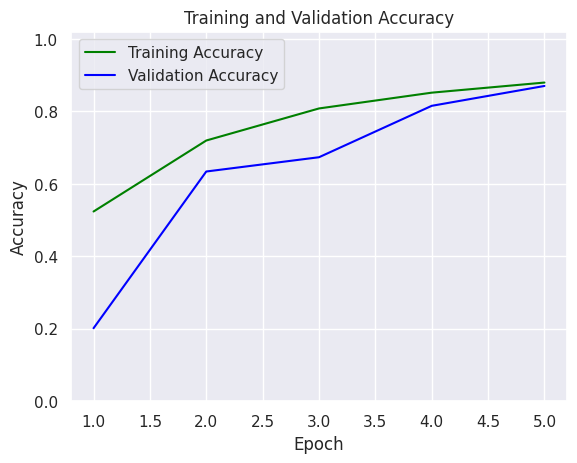

In [ ]:
plt.plot(epochs, acc, color='green', label = 'Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim(0, 1.02)
plt.show()

**Step 8:** Evaluating the **performance** of the model using **Confusion Matrix** (Precision , Recall, F1-Score and Support)

108/108 ━━━━━━━━━━━━━━━━━━━━ 38s 348ms/step

Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.89      0.94       504
                                 Apple___Black_rot       0.80      0.99      0.88       497
                          Apple___Cedar_apple_rust       0.88      0.96      0.92       440
                                   Apple___healthy       0.90      0.94      0.92       502
                               Blueberry___healthy       0.91      0.96      0.94       454
          Cherry_(including_sour)___Powdery_mildew       0.95      0.87      0.90       421
                 Cherry_(including_sour)___healthy       0.93      0.87      0.89       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.66      0.78       410
                       Corn_(maize)___Common_rust_       0.92      1.00      0.96       477
           

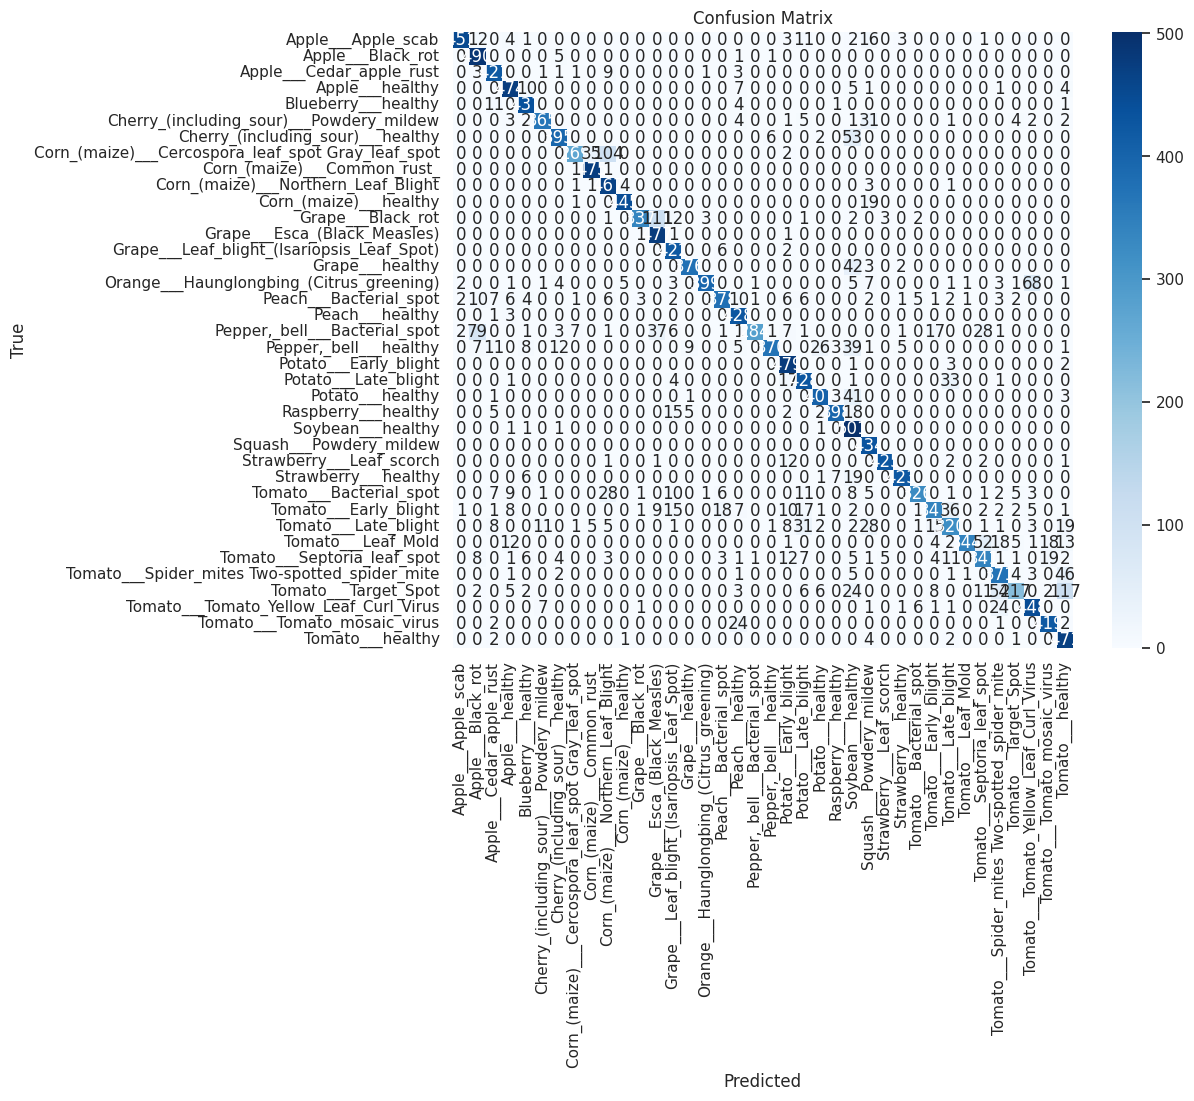

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.models import load_model

model = load_model("best_model.keras")

y_pred = model.predict(test_generator, verbose = 1)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = test_generator.classes

# Print classification report (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names = test_generator.class_indices.keys()))

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = test_generator.class_indices.keys(), yticklabels = test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**Step 9:** Saving the trained model for future use

In [ ]:
model.save('CNN_plantdiseases_model.keras')
model.save('CNN_plantdiseases_model.h5')

**Summary:**

The idea of this project is to build a CNN-based model to classify plant diseases from leaf images of crops such as apples, cherries, grapes, and corn. The system will identify healthy and diseased leaves and classify particular diseases, aiding precision agriculture and crop management.

The important steps performed till now are as follows:
*   Data Collection and Data Augmentation
*   Building, Training, and Optimizing the CNN Model
*   Performance Evaluation using Accuracy and Validation Metrics

The CNN model has been trained successfully.

The next steps includes:

*   Creating a Streamlit-based web app for convenient upload and prediction of images.
*   Thereafter, hosting the web app on Github and Streamlit Cloud for accessible by everyone.